In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

from tubemap import tubemap

In [3]:
g = nx.Graph(tubemap)

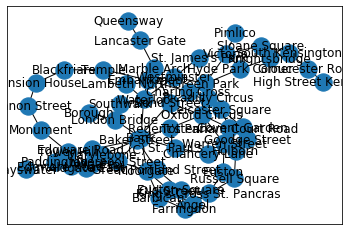

In [4]:
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos) 
nx.draw_networkx_edges(g, pos) 
nx.draw_networkx_labels(g, pos) 
plt.show()

In [76]:
dct = {}
for i, loc in enumerate(g.nodes):
    dct[loc]=i

tubemap_new = {}
for k, v in tubemap.items():
    tubemap_new[dct[k]] = v
    
for k, val in tubemap_new.items():
    dummy = []
    for place in val:
        dummy.append(dct[place])
    tubemap_new[k] = dummy

In [78]:
dct = {}
for i, loc in enumerate(list(tubemap.keys())):
    dct[loc]=i

tubemap_new = {}
for k, v in tubemap.items():
    tubemap_new[dct[k]] = v
    
for k, val in tubemap_new.items():
    dummy = []
    for place in val:
        dummy.append(dct[place])
    tubemap_new[k] = dummy

In [79]:
tubemap_new

{0: [32, 54],
 1: [54, 32],
 2: [27, 39],
 3: [36, 45, 15, 22, 8],
 4: [32, 51, 33, 38, 57],
 5: [19, 38],
 6: [41],
 7: [34, 52],
 8: [35, 40, 23, 3],
 9: [33],
 10: [34, 37],
 11: [25, 51],
 12: [16, 42, 31],
 13: [25, 31],
 14: [36, 41],
 15: [41, 3],
 16: [57, 52, 58, 12],
 17: [27, 56],
 18: [22, 27],
 19: [27, 5],
 20: [24, 48],
 21: [53, 56],
 22: [3, 18],
 23: [58, 26, 42, 40, 55, 8],
 24: [20],
 25: [53, 46, 11, 13],
 26: [28, 23],
 27: [46, 18, 19, 2, 17],
 28: [48, 26],
 29: [57],
 30: [35, 44],
 31: [53, 42, 12, 13],
 32: [38, 4, 0, 1],
 33: [49, 4, 9],
 34: [7, 10],
 35: [8, 30],
 36: [3, 14],
 37: [54, 10],
 38: [39, 5, 32, 4],
 39: [2, 38],
 40: [42, 45, 53, 56, 8, 23],
 41: [14, 6, 15],
 42: [12, 40, 23, 31],
 43: [55],
 44: [30],
 45: [3, 40],
 46: [25, 27],
 47: [48, 55],
 48: [20, 47, 28],
 49: [57, 33],
 50: [55, 58],
 51: [4, 11],
 52: [7, 16],
 53: [25, 40, 21, 31],
 54: [0, 37, 1],
 55: [47, 50, 23, 43],
 56: [17, 21, 40],
 57: [58, 16, 29, 49, 4],
 58: [16, 50, 

In [7]:
G = nx.Graph(tubemap_new)

In [8]:
R = np.matrix(np.zeros(shape=(59, 59)))
#R = pd.DataFrame(R)

for node in G.nodes:
    for x in G[node]:
        if node==33:
            R[x,node]=100

In [9]:
Q= np.matrix(np.zeros(shape=(59, 59)))
Q-=100
for node in G.nodes:
    for x in G[node]:
        Q[node,x]=0
        Q[x,node]=0

In [64]:
import random
def next_number(start,er):
    random_value = random.uniform(0, 1) #chooses a random number between 0 and 1 
    if random_value<er: # if the random number is below the treshold, it chooses next action randomly 
        sample=list(dict(G[start]).keys())
    else:
        sample=np.where(Q[start,] == np.max(Q[start,]))[1]
    #print(sample)
    next_node= np.random.choice(sample)
    return next_node

In [62]:
def updateQ(node1,node2,lr,discount):
    max_index = np.where(Q[node2,] == np.max(Q[node2,]))[1] # finds the index of the highest Q-value
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[node2, max_index]
    Q[node1, node2] = int((1-lr)*Q[node1, node2]+lr*(R[node1, node2] + discount * max_value)) # updates the Q-value using Bellman equation


In [65]:
def learn(er,lr,discount):
    for i in range(50000):
            start = np.random.randint(0, 59)
            next_node=next_number(start,er)
            updateQ(start,next_node,lr,discount)
            
learn(0.5,0.8,0.8) # I set exploration rate, learning rate and discount factor of the learning

In [70]:
def shortest_path(begin,end):
    path=[begin]
    next_node= np.argmax(Q[begin,])
    path.append(next_node)
    while next_node != end:
        next_node= np.argmax(Q[next_node,])
        path.append(next_node)
    return path

In [75]:
shortest_path(19,33)


[19, 5, 38, 4, 33]